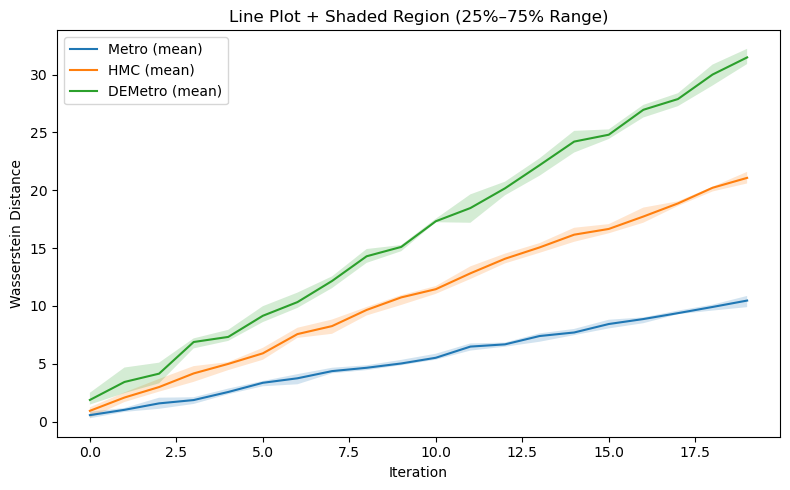

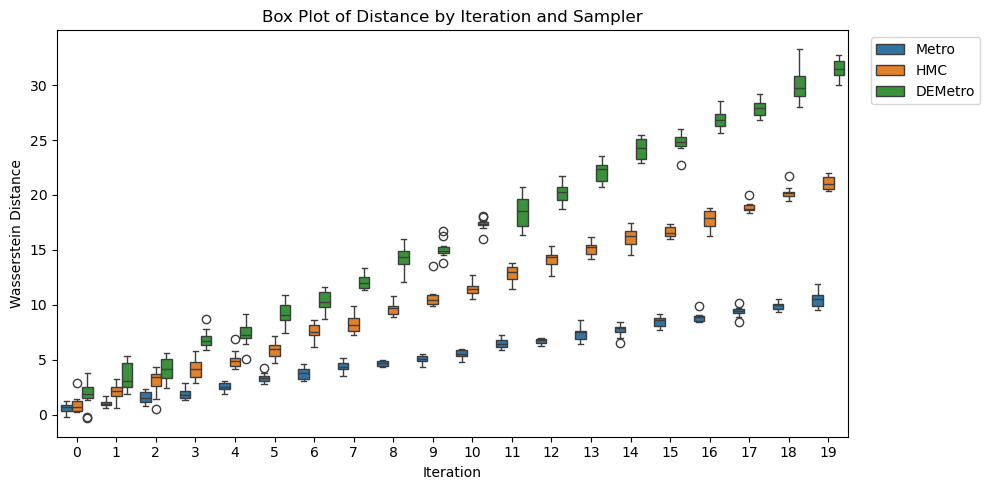

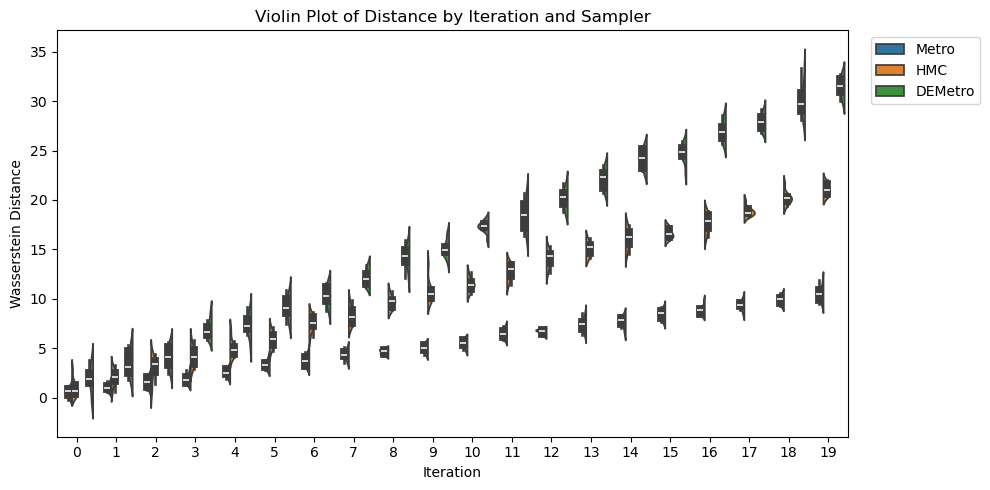

/home/fabian/anaconda3/envs/pymc_immo_env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


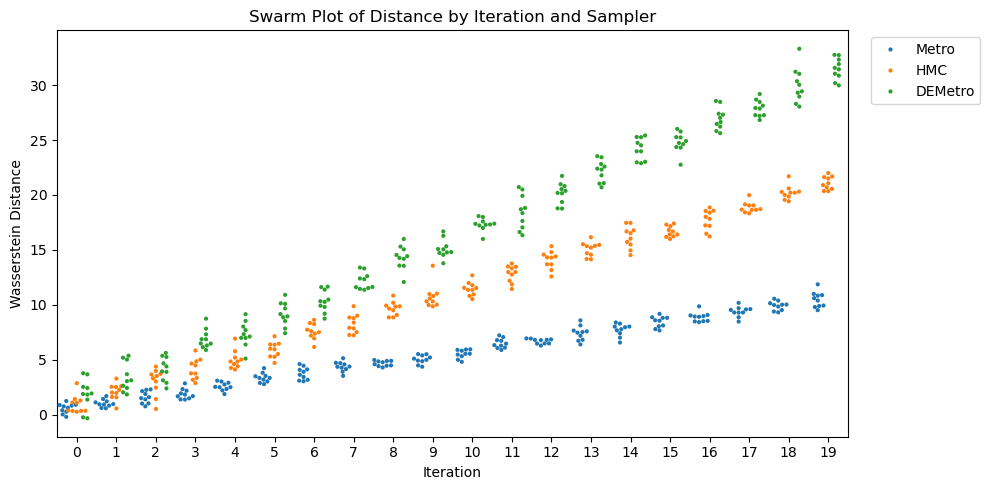

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----- 1) FABRICATE SOME EXAMPLE DATA -----
# Let's pretend we have data from 3 samplers (A, B, C),
# each run 10 times, across 20 "iterations" or steps.

n_samplers = 3
n_runs = 10
n_iterations = 20
samplers = ["Metro", "HMC", "DEMetro"]

# Generate some random "Wasserstein distances" that vary with iteration:
# (In practice, these would come from your actual experiment.)
np.random.seed(42)
all_data = []
for s_idx, sampler_name in enumerate(samplers):
    for run in range(n_runs):
        # Fake "growth" in distance as iteration progresses, plus random noise.
        # Each sampler might have slightly different patterns.
        base = (s_idx + 1)  # just to shift them differently
        trend = np.linspace(0, base * 0.5 * n_iterations, n_iterations)
        noise = np.random.randn(n_iterations) * (0.5 + s_idx * 0.3)
        distances = 0.5 * base + trend + noise
        
        # Store data in a list
        for iteration, dist in enumerate(distances):
            all_data.append({
                "sampler": sampler_name,
                "iteration": iteration,
                "wasserstein_distance": dist
            })

# Convert to a DataFrame for convenience
df = pd.DataFrame(all_data)

# ----- 2) LINE + SHADED REGION PLOT -----
# We'll plot the mean curve and shade between the 25th and 75th percentile.

plt.figure(figsize=(8,5))

for sampler_name in samplers:
    subset = df[df["sampler"] == sampler_name]
    # group by iteration to get distribution across runs
    grouped = subset.groupby("iteration")["wasserstein_distance"]
    x = grouped.mean().index
    mean = grouped.mean().values
    lower = grouped.quantile(0.25).values
    upper = grouped.quantile(0.75).values
    
    plt.plot(x, mean, label=f"{sampler_name} (mean)")
    plt.fill_between(x, lower, upper, alpha=0.2)

plt.title("Line Plot + Shaded Region (25%–75% Range)")
plt.xlabel("Iteration")
plt.ylabel("Wasserstein Distance")
plt.legend()
plt.tight_layout()
plt.show()

# ----- 3) BOX PLOT -----
# Each iteration is treated like a category. 
# This shows a box for each iteration / sampler.

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="iteration", y="wasserstein_distance", hue="sampler")
plt.title("Box Plot of Distance by Iteration and Sampler")
plt.xlabel("Iteration")
plt.ylabel("Wasserstein Distance")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----- 4) VIOLIN PLOT -----
# Similar idea, but you see the "shape" of the distribution.

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="iteration", y="wasserstein_distance", hue="sampler", split=True)
plt.title("Violin Plot of Distance by Iteration and Sampler")
plt.xlabel("Iteration")
plt.ylabel("Wasserstein Distance")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----- 5) SWARM PLOT -----
# Shows each data point (each run) individually, often jittered.

plt.figure(figsize=(10,5))
sns.swarmplot(data=df, x="iteration", y="wasserstein_distance", hue="sampler", dodge=True, size=3)
plt.title("Swarm Plot of Distance by Iteration and Sampler")
plt.xlabel("Iteration")
plt.ylabel("Wasserstein Distance")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


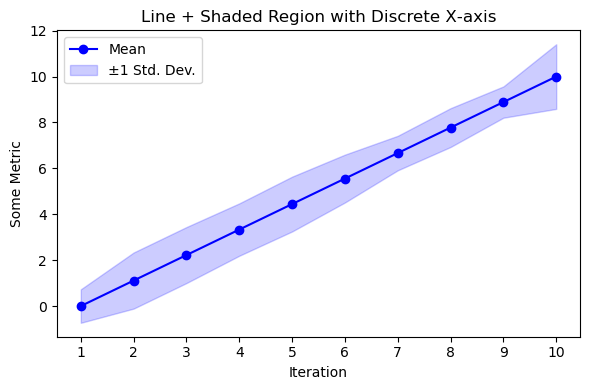

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----- 1) Generate some fake "iteration" data and statistics -----
n_iterations = 10
x_vals = np.arange(1, n_iterations + 1)           # discrete steps: 1..10
mean = np.linspace(0, 10, n_iterations)           # pretend mean values
std  = np.random.uniform(0.5, 1.5, n_iterations)  # pretend ± std dev

# ----- 2) Plot the line + shaded region -----
plt.figure(figsize=(6,4))

# Plot the mean as a line with markers
plt.plot(x_vals, mean, marker='o', color='blue', label='Mean')

# Shade between mean−std and mean+std
plt.fill_between(x_vals, mean - std, mean + std,
                 color='blue', alpha=0.2, label='±1 Std. Dev.')

# Make the x‐axis discrete by forcing ticks to be exactly the iteration numbers
plt.xticks(x_vals, x_vals)

plt.title("Line + Shaded Region with Discrete X‐axis")
plt.xlabel("Iteration")
plt.ylabel("Some Metric")
plt.legend()
plt.tight_layout()
plt.show()
